In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Jointed_ficher_v1.csv')

In [3]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,City,Hour,Start_Date,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility
0,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
1,2008,1,3,4,1749.0,1705,1933.0,1844,EV,104.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
2,2008,1,3,4,2108.0,1740,2251.0,1930,9E,103.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
3,2008,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
4,2008,1,3,4,1845.0,1841,1955.0,1931,NW,130.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
5,2008,1,3,4,1801.0,1800,1834.0,1815,AA,93.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
6,2008,1,3,4,1644.0,1510,1845.0,1725,WN,121.0,...,Indianapolis,15,2008-01-03 15:00:00,8.9,4.5,82.19,7.6,0.0,0.0,10.0
7,2008,1,3,4,1647.0,1535,1812.0,1714,EV,85.0,...,Indianapolis,15,2008-01-03 15:00:00,8.9,4.5,82.19,7.6,0.0,0.0,10.0
8,2008,1,3,4,1452.0,1425,1640.0,1625,WN,228.0,...,Indianapolis,14,2008-01-03 14:00:00,6.2,2.5,84.66,4.8,0.0,0.0,10.0
9,2008,1,3,4,1423.0,1400,1726.0,1620,XE,183.0,...,Indianapolis,14,2008-01-03 14:00:00,6.2,2.5,84.66,4.8,0.0,0.0,10.0


In [4]:
meteo=df.loc[:,['Temperature','Dew Point','Relative Humidity','Wind Speed','Precipitation','Precipitation Cover','Visibility','WeatherDelay']]
meteo=meteo[meteo['WeatherDelay'] > 0]

In [5]:
print(df.shape)
print(meteo.shape)
meteo.head()

(1110138, 32)
(1110138, 8)


,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,WeatherDelay
0,16.6,8.8,70.99,8.1,0.0,0.0,10.0,0.0
1,16.6,8.8,70.99,8.1,0.0,0.0,10.0,0.0
2,16.6,8.8,70.99,8.1,0.0,0.0,10.0,0.0
3,19.1,10.1,67.40,7.7,0.0,0.0,10.0,0.0
4,19.1,10.1,67.40,7.7,0.0,0.0,10.0,0.0


In [6]:
X=meteo.iloc[:,:-1].values
y=meteo.iloc[:,7].values
X
y

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

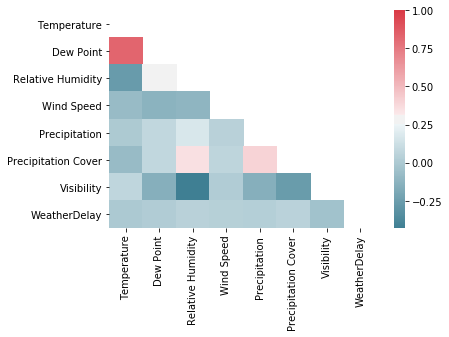

In [8]:
plot_corr(meteo.corr())

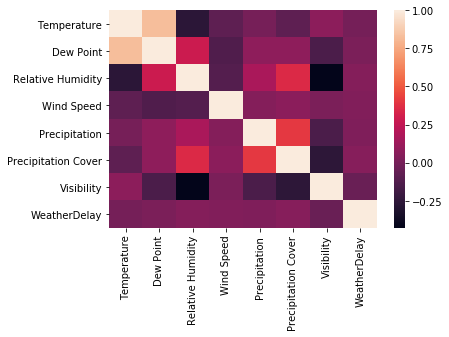

In [9]:
sns.heatmap(meteo.corr())

In [10]:
X=X[:,[0,2,3,4,5,6]]
X

array([[16.6 , 70.99,  8.1 ,  0.  ,  0.  , 10.  ],
       [16.6 , 70.99,  8.1 ,  0.  ,  0.  , 10.  ],
       [16.6 , 70.99,  8.1 ,  0.  ,  0.  , 10.  ],
       ...,
       [58.1 , 74.76,  6.9 ,  0.  ,  0.  , 10.  ],
       [74.  , 87.47, 12.6 ,  0.  ,  0.  ,  8.7 ],
       [80.  , 71.1 , 16.2 ,  0.  ,  0.  , 10.  ]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 1.01759283, -0.34137289,  0.1971673 , -0.14137101, -0.34881674,
         0.13118251],
       [-1.35757602, -0.28929699,  1.98180586, -0.14137101, -0.34881674,
         0.13118251],
       [-0.04447454,  1.2871827 ,  1.47440862,  2.45559676,  2.86684113,
        -1.67432184],
       ...,
       [ 0.24035262,  0.27927722,  1.26445114, -0.14137101, -0.34881674,
         0.13118251],
       [ 0.72311051,  0.09890522, -0.15276183, -0.14137101, -0.34881674,
         0.13118251],
       [ 1.27345451, -0.36030959,  1.01950075, -0.14137101, -0.34881674,
         0.13118251]])

In [13]:
scaler.mean_

array([5.80212598e+01, 6.42708239e+01, 8.77310153e+00, 5.44369504e-03,
       1.08474457e+01, 9.36061850e+00])

In [14]:
scaler.scale_

array([20.71431681, 21.12301237,  5.71544303,  0.03850645, 31.09783562,
        4.8739844 ])

In [15]:
regressor=LinearRegression()
regressor.fit(X_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
scaler.transform(X_test)

array([[ 0.92586883, -0.05921617, -0.01279018, -0.14137101, -0.34881674,
         0.13118251],
       [ 0.63621409,  0.51361879, -1.20254922, -0.14137101, -0.34881674,
        -0.46381324],
       [ 1.37966125,  0.11310774,  0.54709643, -0.14137101, -0.34881674,
         0.13118251],
       ...,
       [-0.66723223,  0.46201631, -0.81762717, -0.14137101, -0.34881674,
         0.13118251],
       [-0.82654233, -0.09424905,  1.71935901, -0.14137101, -0.34881674,
         0.13118251],
       [-0.90861118,  0.69541105, -1.48249252, -0.14137101, -0.34881674,
         0.13118251]])

In [17]:
y_pred=regressor.predict(X_test)
print(y_pred)

[69.24709851 72.02662466 76.50918075 ... 65.39487216 67.36778906
 64.73853698]


In [18]:
regressor.coef_

array([ 0.24416301,  0.69848505,  0.75764512,  0.14111081,  0.60202422,
       -0.32580064])

In [19]:
regressor.intercept_

3.045680152234421

In [20]:
r2_score(y_test,y_pred)

-15.82130274982141